## 27단계: 테일러 급수 미분

> 지금부터는 DeZero를 사용하여 구체적인 문제를 몇 개 풀어보겠습니다. 이번 단계의 목표는 sin 함수의 미분입니다. \
아시듯이 sin의 미분은 해석적으로 풀립니다. 그러니 우선은 정공법으로 sin 함수를 DeZero로 구현하고, 이어서 그 미분을 테일러 급수를 이용해 계산해보겠습니다.

### 27.1 sin 함수 구현

$y = sin(x)$일 때 그 미분은 $\frac{\partial y}{\partial x} = cos(x)$이다.

In [ ]:
import numpy as np
from dezero import Variable, Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx

def sin(x):
    return Sin()(x)


# x = π/4
x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)  # 1 / √2
print(x.grad)

0.7071067811865475
0.7071067811865476


### 27.2 테일러 급수 이론

테일러 급수는 다음과 같다.

<img src="images/식 27.1.png" width=600/>

여기서 $a = 0$일 때의 테일러 급수를 맥클로린 급수라 한다.

<img src="images/식 27.2.png" width=550/>

$f(x) = sin(x)$를 맥클로린 전개하면 $sin(0) = 0$, $cos(0) = 1$이기 때문에 다음 식을 도출할 수 있다.

<img src="images/식 27.3.png" width=500/>

### 27.3 테일러 급수 구현

`식 27.3`에 따라 sin 함수를 구현해보자.

In [2]:
import math

def my_sin(x, threshold=1e-4):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2*i + 1)
        t = c * x ** (2*i + 1)
        y += t
        if abs(t.data) < threshold:
            break
    return y

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


### 27.4 계산 그래프 시각화

threshold = 0.0001일 때 계산 그래프

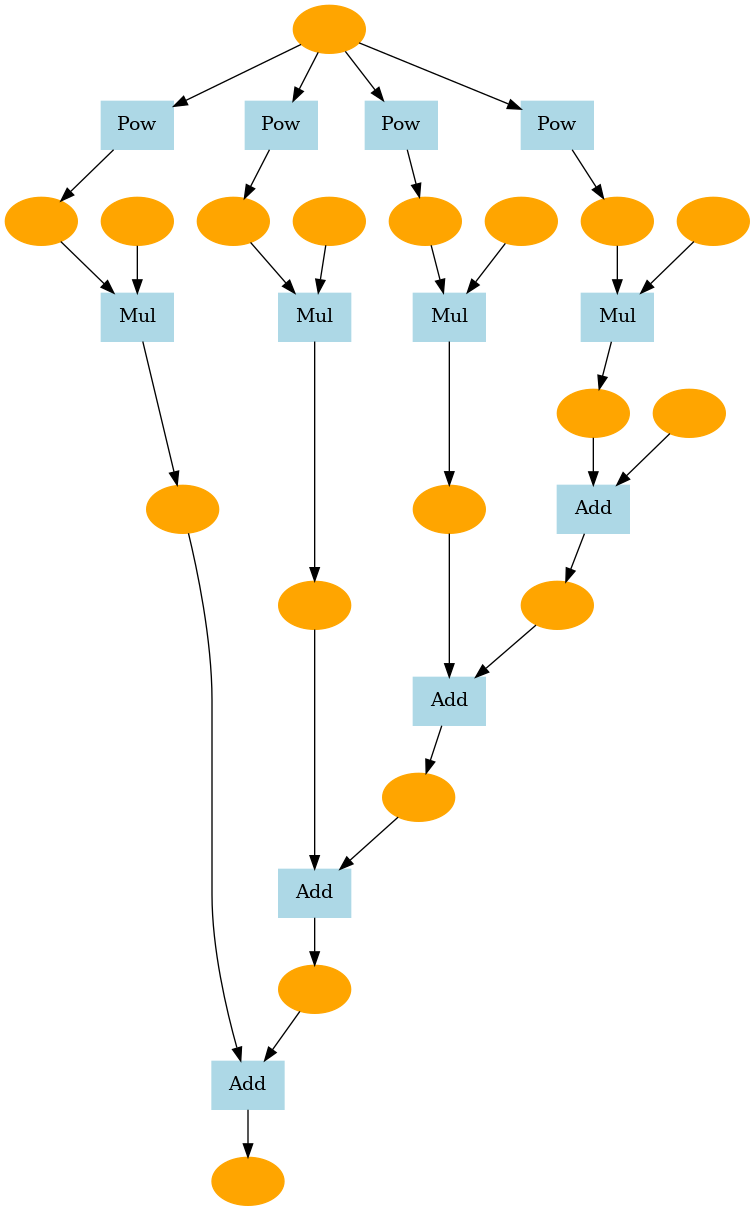

In [4]:
from dezero.utils import plot_dot_graph

plot_dot_graph(y, verbose=False)

threshold = 1e-150일 때 계산 그래프

In [6]:
x = Variable(np.array(np.pi/4))
y = my_sin(x, threshold=1e-150)
y.backward()

plot_dot_graph(y, verbose=False)